Naive Bayes is the simplest and fastest classification algorithm for a large chunk of data. In various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems, Naive Bayes classifier is used successfully. It uses the Bayes probability theorem for unknown class prediction.

The Bayes theorem is used by the Naive Bayes Classifier to forecast membership probabilities for each class, such as the likelihood that a given record or data point belongs to that class. The most likely class is defined as the one having the highest probability.

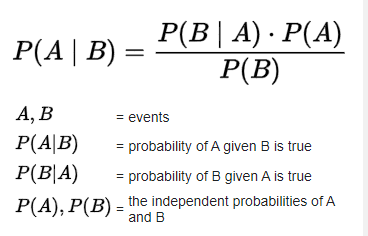

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
data = pd.read_csv('dataset/app_review.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [6]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data
data = preprocess_data(data)
data.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [7]:
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [8]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
print(model.score(x_test, y_test))
print(model.predict(vec.transform(['Love this app simply awesome!'])))
print(model.predict(vec.transform(['Its getting stuck alot while using the app'])))

0.8565022421524664
[1]
[0]


array([0], dtype=int64)